This is used to create plots for Example 1 in the graphical evaluation paper.

The figures present including the following:

[1] Overall model performance evaluation
    • Scatter plot between sim and obs
    • Boxplot of predictions, timeseries for annual loads 

[2] Parameter evaluation
    Boxplot + scatter plot

[3] Finer temporal scale evaluation

[4] Event-scale diagnosis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# TODO: Data -- observations and modelling
# Scatter plot of obs vs. mod for all years with uncertainty shown as bars
data_dir = '../output/work_100_0.005_4_unbased/'
fig_dir = '../output/figs/'
fn_obs = 'din_obs_ensemble.csv'
fn_mod = 'Sandy_Creek.11.obs.csv'
# Read data into dataframes
din_obs = pd.read_csv(data_dir + fn_obs, index_col = 'real_name')
din_mod = pd.read_csv(data_dir + fn_mod, index_col = 'real_name')
din_mod.columns = din_obs.columns
din_obs['Type'] = 'Observation'
din_mod['Type'] = 'Simulation'

# Combine to one dataframe by adding a column "Type" to distinguish between obs and mod
din_comb = pd.concat([din_obs, din_mod], axis = 0).\
    melt(id_vars = 'Type', var_name = 'Year', value_name='Annual DIN load (t)')

# Calculate quantiles:
obs_err = np.abs(din_obs.loc[:, :'DIN_2022'].quantile([0.025, 0.975], axis=0) \
                 - din_obs.loc[0, :'DIN_2022']).astype(float).round(3)
mod_err = np.abs(din_mod.loc[:, :'DIN_2022'].quantile([0.025, 0.975], axis=0) \
                 - din_mod.loc[0, :'DIN_2022']).astype(float).round(3)


## 1-1 Scatter plot

In [3]:
# Define x and y values for plotting
obs_base = din_obs.loc[0, :'DIN_2022'].astype(float)
mod_base = din_mod.loc[0, :'DIN_2022'].astype(float)
lab_fontsize = 12

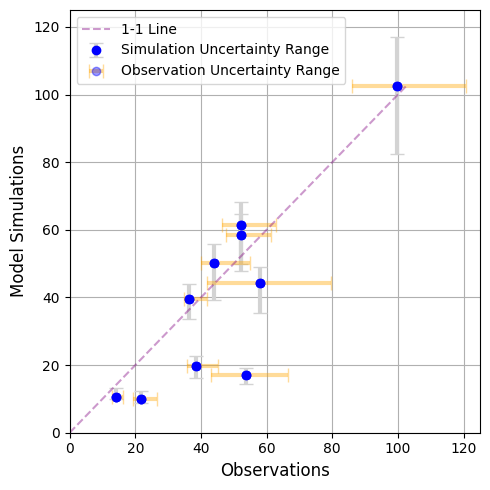

In [21]:
# Create the scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(obs_base, mod_base, color='blue')

# Add error bars to both observations and simulations
plt.errorbar(obs_base, mod_base, yerr=mod_err, fmt='o', color='blue', 
             ecolor='lightgray', elinewidth=3, capsize=5, label='Simulation Uncertainty Range')
plt.errorbar(obs_base, mod_base, xerr=obs_err, fmt='o', color='blue', 
             ecolor='orange', alpha = 0.4, elinewidth=3, capsize=5, label='Observation Uncertainty Range')


# Add the 1-1 line
max_value = max(obs_base.max(), mod_base.max())  # Get the maximum value for the axis limits
plt.plot([0, max_value], [0, max_value], color='purple', alpha=0.4, linestyle='--', label='1-1 Line')

# Add labels and title
plt.xlabel('Observations', fontsize = lab_fontsize)
plt.ylabel('Model Simulations', fontsize = lab_fontsize)
plt.xlim(0,125)
plt.ylim(0,125)
plt.legend()

# Show the plot
plt.grid()
plt.tight_layout()
plt.savefig(f'{fig_dir}ScatterPlotWith Unctn Range.png', format = 'png', dpi = 300)

## 1-2 Time series with uncertainty ranges


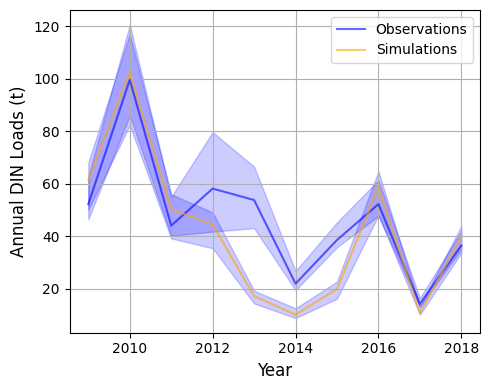

In [20]:
# Plot with uncertainty ranges
plt.figure(figsize=(5, 4))
year_range = np.arange(2009, 2019)
plt.plot(year_range, obs_base, alpha = 0.6, label='Observations', color='blue')
plt.plot(year_range, mod_base, alpha = 0.6, label='Simulations', color='orange')

# Add a shaded area for uncertainty (95PPU)
plt.fill_between(year_range, \
                 (obs_base.values - obs_err.values[0]), \
                 (obs_base.values + obs_err.values[1]), \
                 color='blue', alpha=0.2)
plt.fill_between(year_range, \
                 (mod_base.values - mod_err.values[0]), \
                 (mod_base.values + mod_err.values[1]), \
                 color='blue', alpha=0.2)

# Add labels and title
plt.xlabel('Year', fontsize = lab_fontsize)
plt.ylabel('Annual DIN Loads (t)', fontsize = lab_fontsize)
plt.legend()

# Show the plot
plt.grid()
plt.tight_layout()
plt.savefig(f'{fig_dir}TimeseriestWithUnctnRange.png', format = 'png', dpi = 300)

## 2-1 Boxplot of parameter posteriors

In [9]:
# Read parameter values
par_fn = 'parameter_absolute_value.csv'
par_df = pd.read_csv(data_dir + par_fn, index_col='real_name')
par_melt = pd.melt(par_df, var_name='Parameter Name', value_name='Parameter Value')

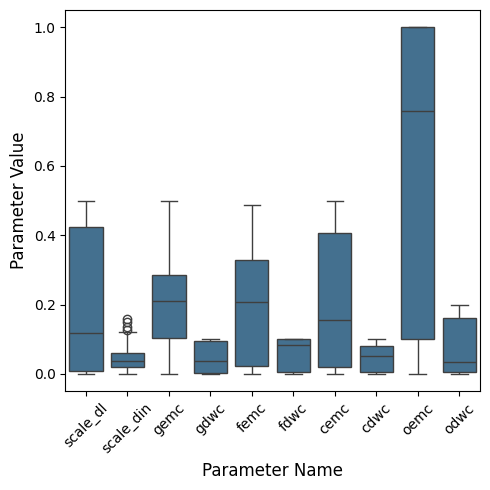

In [10]:
# Boxplot
plt.figure(figsize=(5, 5))
ax = sns.boxplot(data=par_melt, x = 'Parameter Name', y = 'Parameter Value', saturation=0.5)
plt.ylabel('Parameter Value', fontsize = lab_fontsize)
plt.xlabel('Parameter Name', fontsize = lab_fontsize)
plt.xticks(rotation = 45);
# Show the plot
plt.tight_layout()
plt.savefig(f'{fig_dir}BoxPlotParameterUncertainty.png', format = 'png', dpi = 300)

## 2-2 Pairwise Plot between parameters: SDR and gEMC

<Figure size 400x800 with 0 Axes>

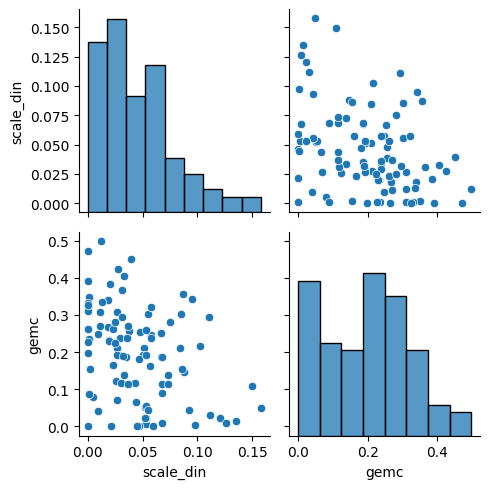

In [19]:
plt.figure(figsize=(4, 8))
sns.pairplot(par_df.loc[:, ['scale_din','gemc']])
plt.ylabel(plt.gca().get_ylabel(), fontsize = lab_fontsize)
plt.xlabel(plt.gca().get_xlabel(), fontsize = lab_fontsize)
# Show the plot
plt.tight_layout()
plt.savefig(f'{fig_dir}PairPlotParameters.png', format = 'png', dpi = 300)